# Medical Cost Personal Insurance Project

libraries required for analysing the data

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

read the data set

In [2]:
df=pd.read_csv('medical.csv')
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


Understanding and analysing the data

In [3]:
df.shape

(1338, 7)

In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

we have categorical data here as observed

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

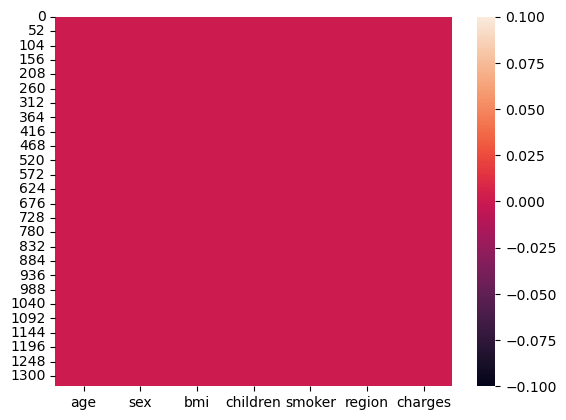

In [6]:
sns.heatmap(df.isnull())

data analysis

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.nunique().to_frame(" unqiue no.")

,unqiue no.
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


data visualization

data analysis of the single feature 

male      676
female    662
Name: sex, dtype: int64


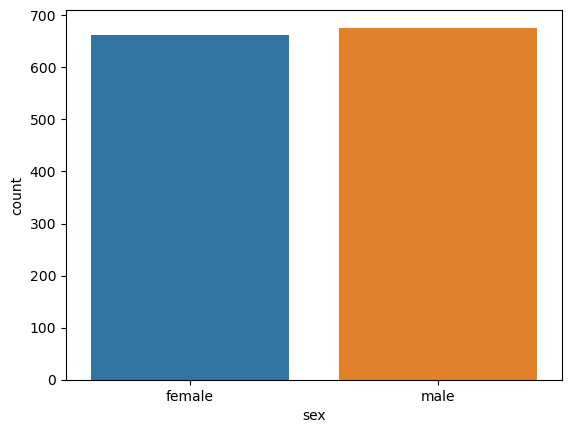

In [9]:
ax = sns.countplot(x='sex', data=df)
print(df['sex'].value_counts())

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


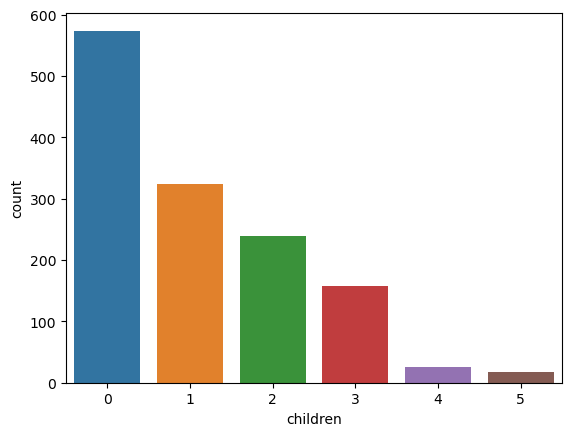

In [10]:
ax = sns.countplot(x='children', data=df)
print(df['children'].value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


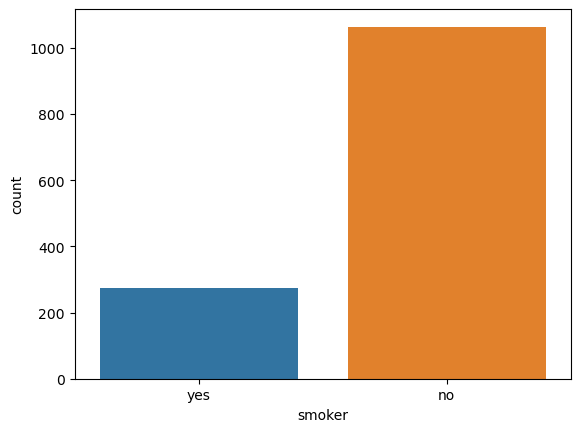

In [11]:
ax = sns.countplot(x='smoker', data=df)
print(df['smoker'].value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


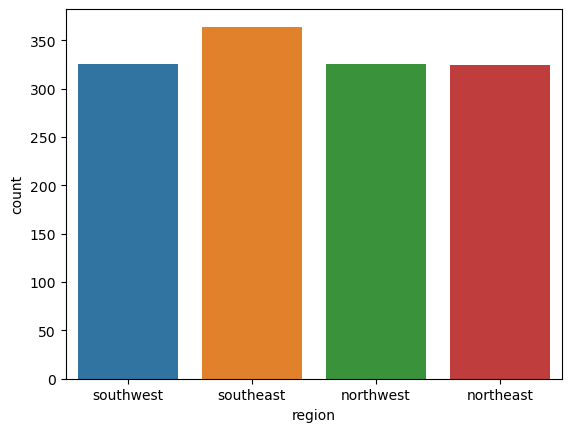

In [12]:
ax = sns.countplot(x='region', data=df)
print(df['region'].value_counts())

data analysis with the other features ,multi varient analysis

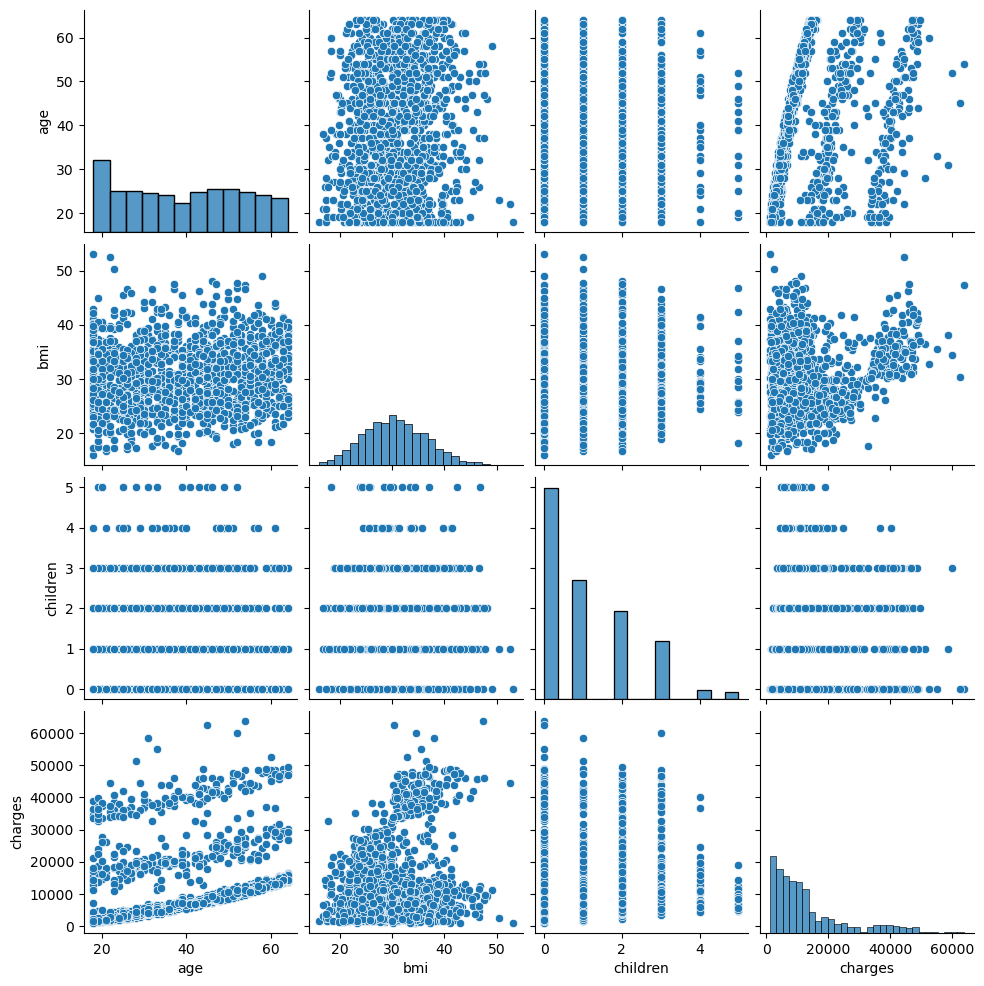

In [13]:
sns.pairplot(data=df)

Text(0.5, 1.0, 'BMI VS Charge')

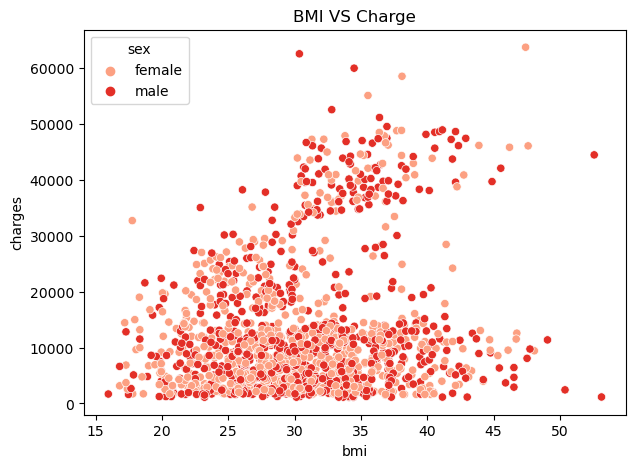

In [14]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=df,palette='Reds')
plt.title('BMI VS Charge')

<Axes: title={'center': 'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

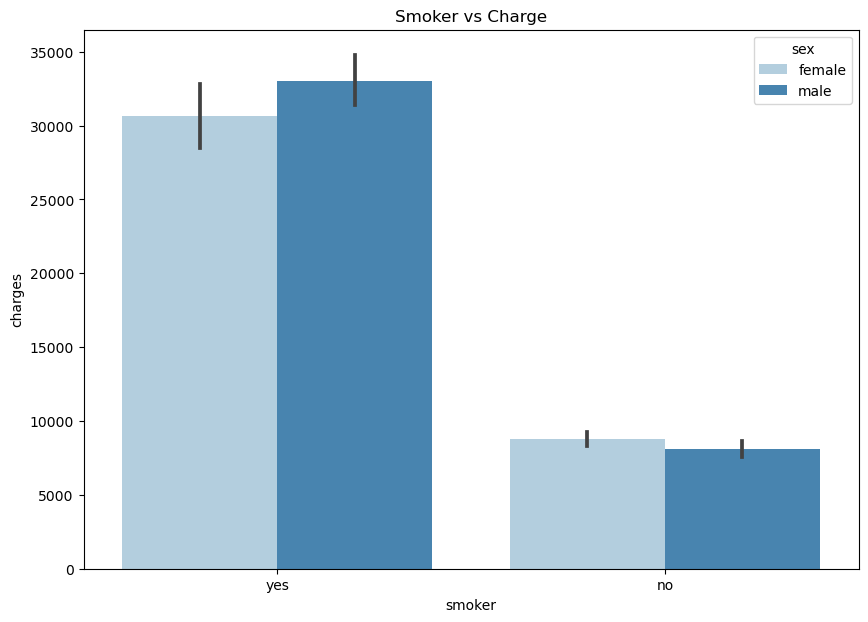

In [15]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=df,palette='Blues',hue='sex')


<Axes: title={'center': 'Sex vs Charges'}, xlabel='sex', ylabel='charges'>

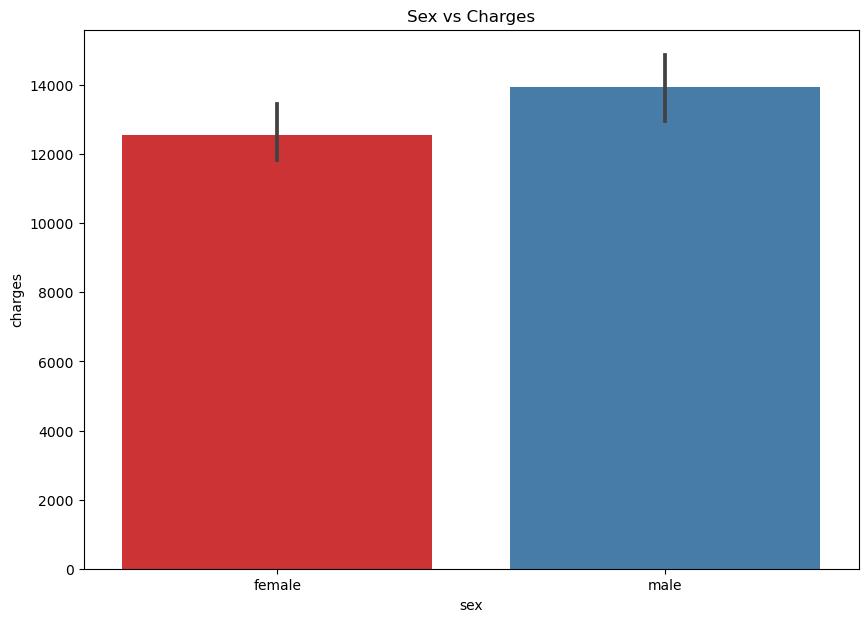

In [16]:
plt.figure(figsize=(10,7))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=df,palette='Set1')

finding the outliers 

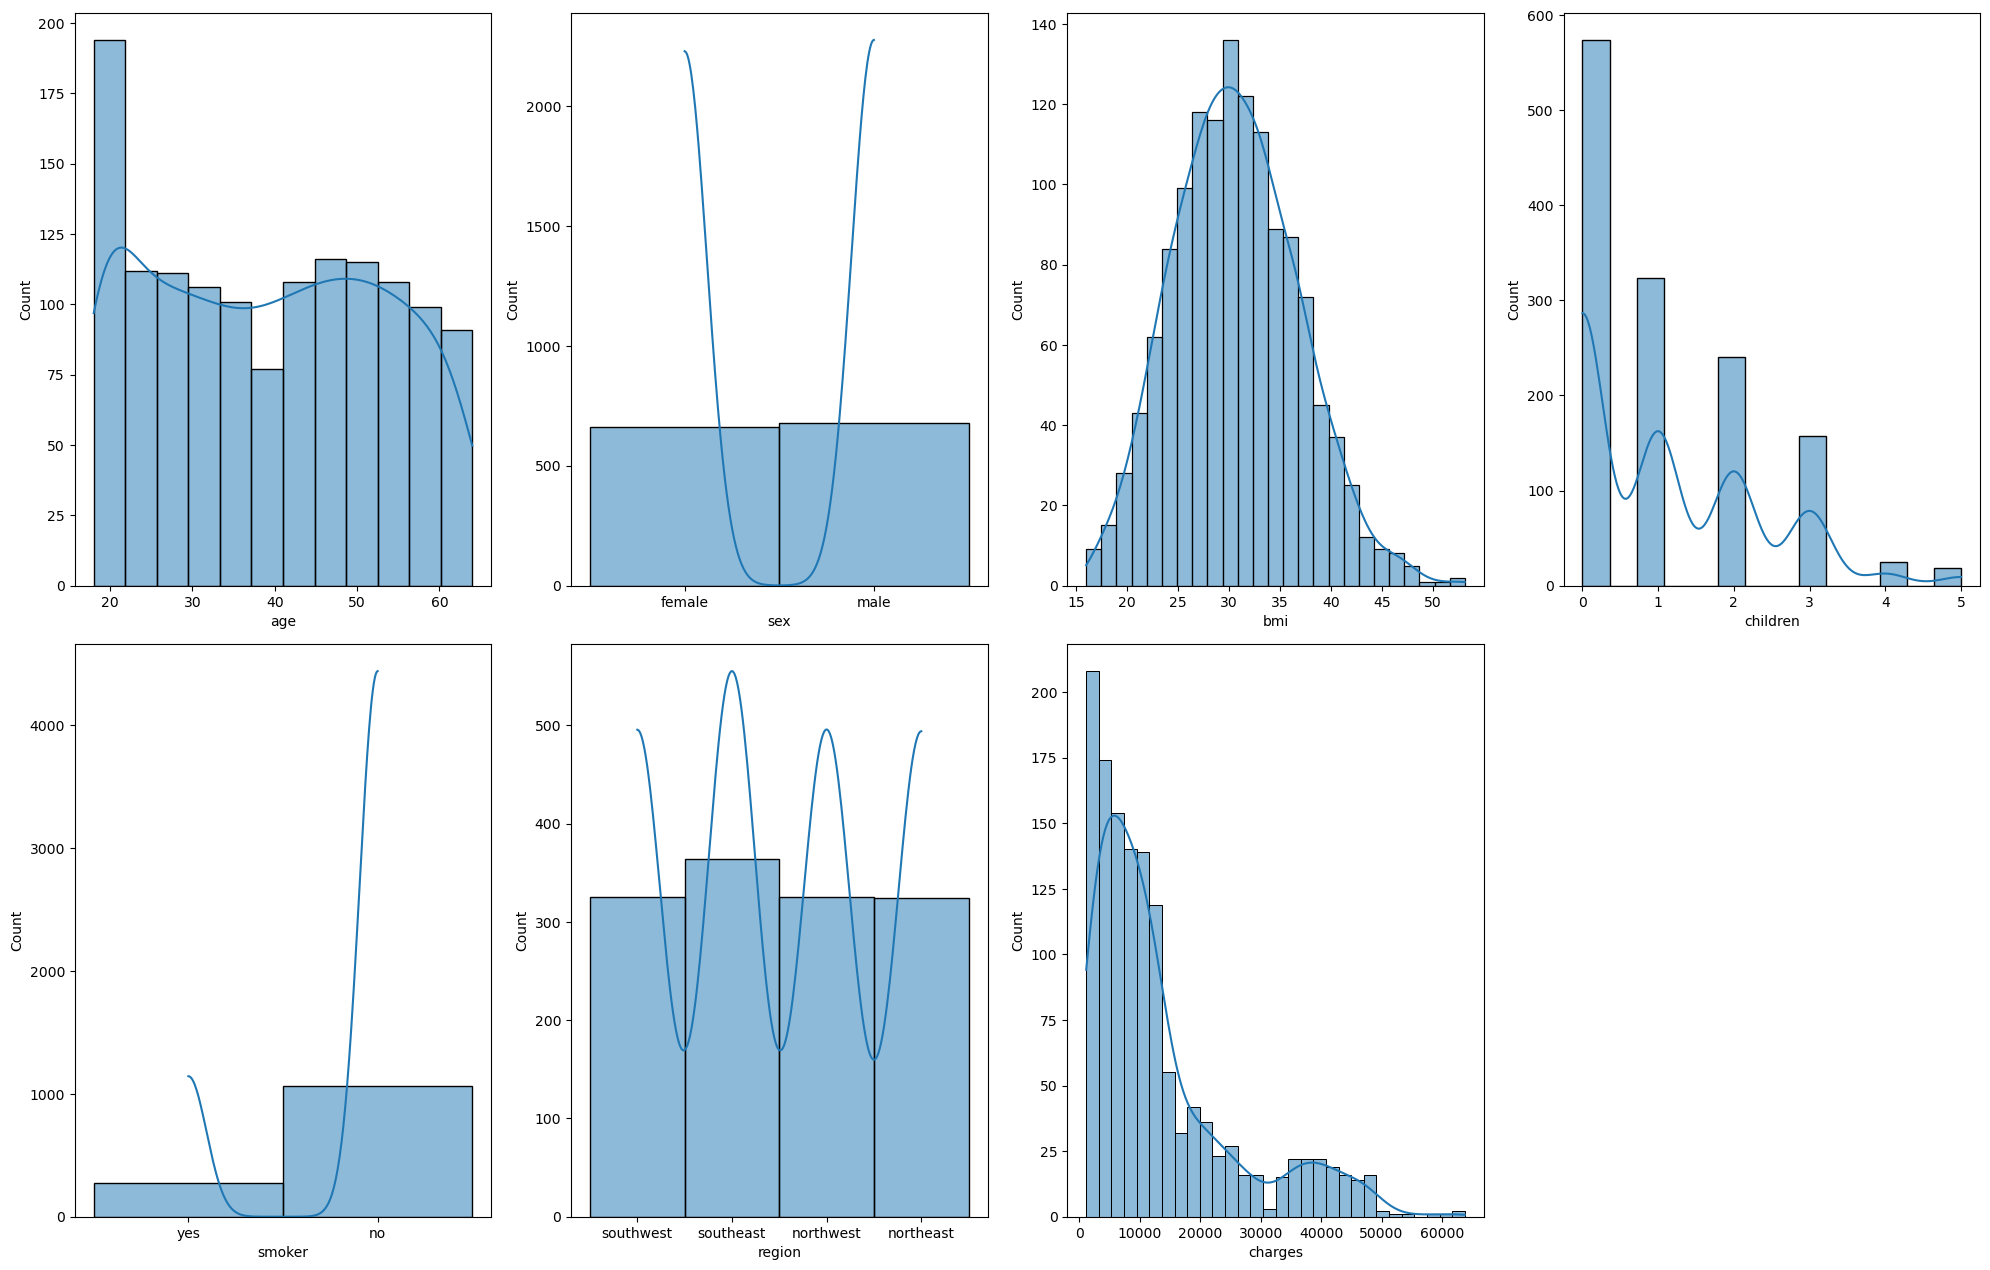

In [17]:
plt.figure(figsize=(20, 25))
pltno = 1
for i in df.columns:
    if pltno <= 16:
        ax = plt.subplot(4, 4, pltno)
        sns.histplot(df[i], kde=True)
        plt.xlabel(i)  
    pltno += 1
plt.tight_layout()
plt.show()

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

so ..from above plot we observe how there are lot of overweights from 25 to 40
and lot of cost is at range on 5000 to 15000 apx

rename the categories of numerical value

In [18]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)

In [19]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


checking for skewness

In [20]:
df.skew()

age         0.055673
sex         0.020951
bmi         0.284047
children    0.938380
smoker     -1.464766
region      0.049225
charges     1.515880
dtype: float64

correlation

In [21]:
cor=df.corr()
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,0.025019,0.006308,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,0.076185,0.012816,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,-0.003750,-0.262754,0.198341
children,0.042469,-0.017163,0.012759,1.000000,-0.007673,0.001205,0.067998
smoker,0.025019,0.076185,-0.003750,-0.007673,1.000000,0.038873,-0.787251
region,0.006308,0.012816,-0.262754,0.001205,0.038873,1.000000,-0.039473
charges,0.299008,-0.057292,0.198341,0.067998,-0.787251,-0.039473,1.000000


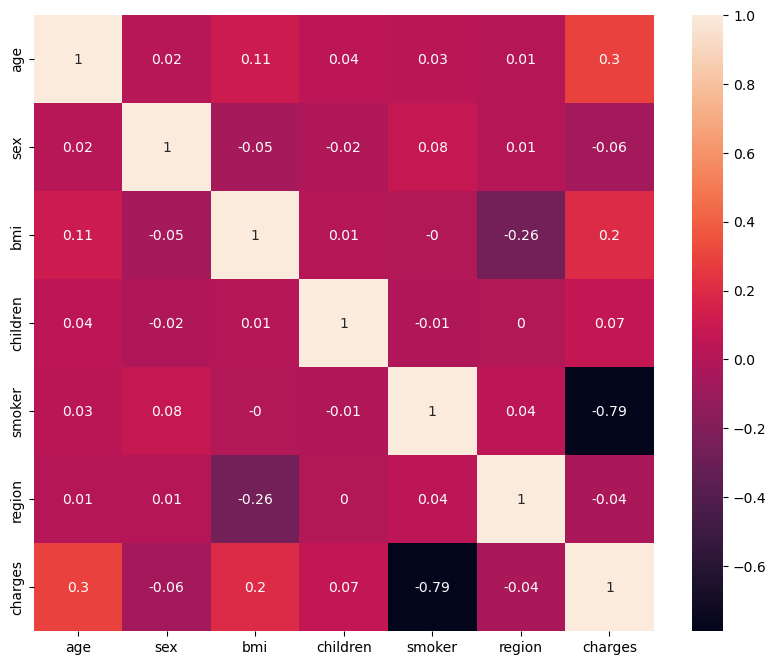

In [22]:
cr=df.corr().round(2)
plt.figure(figsize=(10,8))
plot=sns.heatmap(cr, annot=True)

Text(0, 0.5, 'Target')

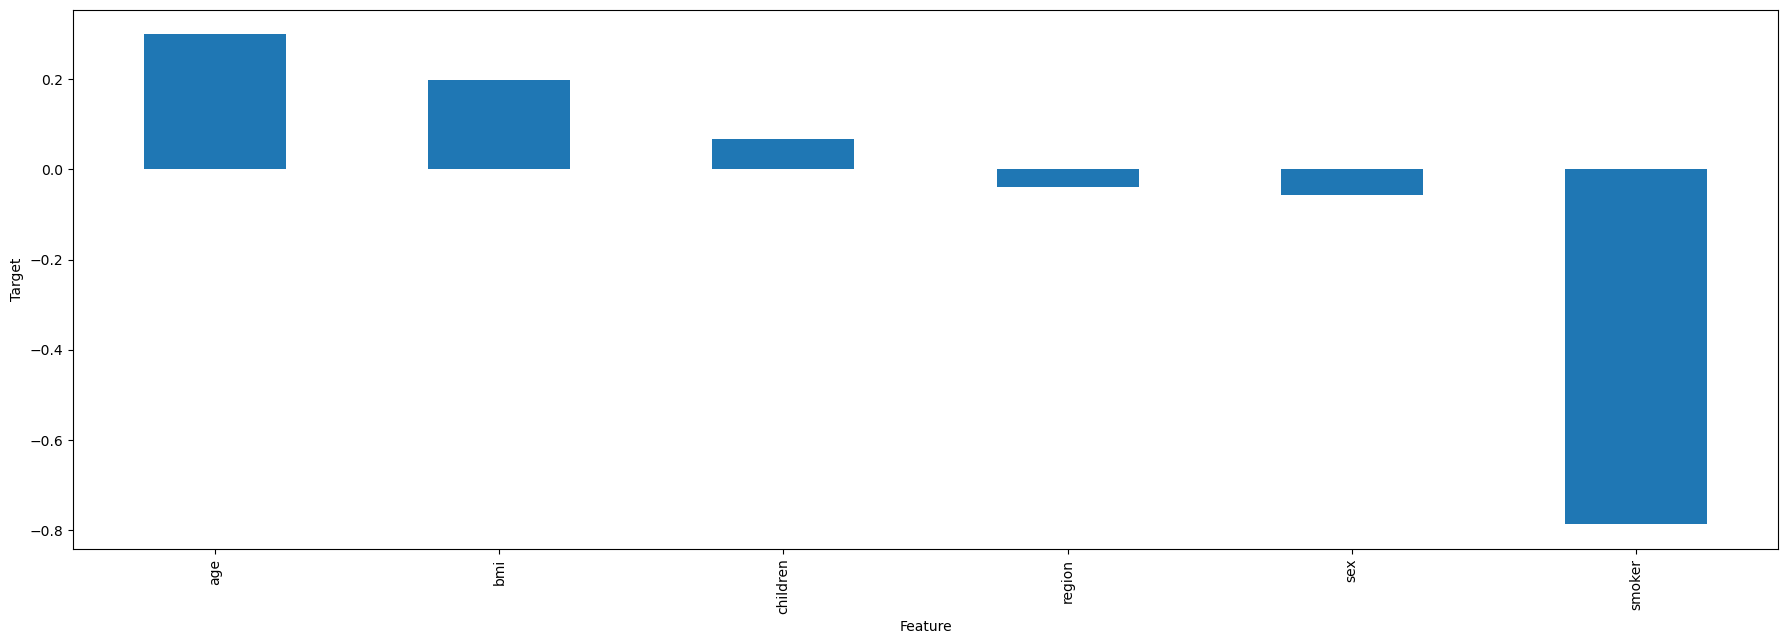

In [23]:

plt.show()
plt.figure(figsize=(22, 7))
df.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Target')


feature scaing

In [24]:

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error, r2_score, classification_report, confusion_matrix, roc_curve

from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.svm import SVC,SVR
from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [25]:
x=df.drop(['charges'],axis=1)
y=df['charges']

In [26]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,2
4,32,0,28.880,0,1,2
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2
1334,18,1,31.920,0,1,3
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [27]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [28]:
print("feature dimension",x.shape)
print("label dimension",y.shape)

feature dimension (1338, 6)
label dimension (1338,)


In [29]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.438764,1.010519,-0.453320,-0.908614,-1.970587,-0.402874
1,-1.509965,-0.989591,0.509621,-0.078767,0.507463,-1.288007
2,-0.797954,-0.989591,0.383307,1.580926,0.507463,-1.288007
3,-0.441948,-0.989591,-1.305531,-0.908614,0.507463,0.482258
4,-0.513149,-0.989591,-0.292556,-0.908614,0.507463,0.482258
...,...,...,...,...,...,...
1333,0.768473,-0.989591,0.050297,1.580926,0.507463,0.482258
1334,-1.509965,1.010519,0.206139,-0.908614,0.507463,1.367391
1335,-1.509965,1.010519,1.014878,-0.908614,0.507463,-1.288007
1336,-1.296362,1.010519,-0.797813,-0.908614,0.507463,-0.402874


In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif[" VIF val"]= [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Feature"]=x.columns
vif

,VIF val,Feature
0,1.016405,age
1,1.008888,sex
2,1.091118,bmi
3,1.002254,children
4,1.007953,smoker
5,1.077204,region


splitting data into testing and training data

In [31]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


In [32]:
print(x_train.shape,x_test.shape,y_train.shape , y_test.shape)

(1003, 6) (335, 6) (1003,) (335,)


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


LINEAR REGRESSION

In [34]:

LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [35]:
cv = cross_val_score(estimator = LR, X = x, y = y, cv = 10)

y_pred_train = LR.predict(x_train)
r2_score_train= r2_score(y_train, y_pred_train)

y_pred_test = LR.predict(x_test)
r2_score_test = r2_score(y_test, y_pred_test)

rmse= (np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('CV Linear Regression : {0:.3f}'.format(cv.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_test))
print('RMSE : {0:.3f}'.format(rmse))


CV Linear Regression : 0.745
R2_score (train) : 0.745
R2_score (test) : 0.767
RMSE : 5924.679


RandomForest Regressor

In [36]:
rf = RandomForestRegressor()

In [37]:
rf= RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                       n_estimators=1200)
rf.fit(x, y.ravel())

RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                      n_estimators=1200)

In [38]:
model = RandomForestRegressor(max_depth=15, min_samples_split=2, random_state=1)
model.fit(x_train, y_train)
pred = model.predict(x_test)

r2 = r2_score(y_test, pred)
print("R2 score:", r2)
mae = mean_absolute_error(y_test, pred)
print("MAE:", mae)
mse = mean_squared_error(y_test, pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
accuracy = 1 - (mae / np.mean(y_test))

print(f"Accuracy: {accuracy * 100:.2f}%")

R2 score: 0.8507718163681028
MAE: 2544.252874921112
MSE: 22517210.704259023
RMSE: 4745.230310981652
Accuracy: 80.84%


In [39]:
val=(18,0,33.770,1,1,0)
input=np.asarray(val)
inp=input.reshape(1,-1)
print(inp)

[[18.    0.   33.77  1.    1.    0.  ]]


In [40]:
predict=LR.predict(inp)
print(predict)

[140057.83439941]


In [41]:
val=(19,1,27.900,0,0,1)
input=np.asarray(val)
inp=input.reshape(1,-1)
print(inp)

[[19.   1.  27.9  0.   0.   1. ]]


In [42]:
predict=LR.predict(inp)
print(predict)

[140815.32987297]


save the model

In [43]:
import joblib
import pickle
filename="meedical.pkl"
pickle.dump(model,open(filename,'wb'))

In [44]:
with open(filename, 'wb') as file:  
    pickle.dump(model, file)

In [45]:
with open(filename, 'rb') as file:  
    rf_pred = pickle.load(file)

In [46]:
rf_pred

RandomForestRegressor(max_depth=15, random_state=1)

In [47]:
prediction=model.predict(x_test)  
prediction

array([12586.32853798,  5328.227152  , 28274.782607  , 10216.86665358,
       34176.2267125 ,  8534.02189163,  2168.9245505 , 14307.6342185 ,
        5728.530723  , 11083.53852538, 19769.6562494 ,  7008.60544161,
        5086.79071371, 46088.2819584 , 48564.8809905 , 45514.0917365 ,
        9806.1313615 , 42897.5606002 ,  9649.1871194 , 23485.3263905 ,
        5612.38876866,  9317.73675445,  1906.92528896,  2619.589331  ,
       12646.6387359 , 11417.76015444, 13382.994291  ,  5972.47766168,
       11382.97318568,  2781.30898067,  7821.1334043 , 11740.35804399,
        3212.8272791 ,  5622.53657637,  3239.26731416, 11669.4885952 ,
        3167.7492253 ,  8523.5779494 , 24202.1291982 , 39712.34010233,
        7482.5281543 ,  3128.1661203 , 12568.89045592, 14482.9327082 ,
        5666.4401714 , 14627.0637671 , 14519.2604174 ,  6210.59609133,
       41508.4960427 ,  6747.3286894 , 13891.083942  ,  2247.7929348 ,
        7596.12963095,  1738.3408365 , 10909.91720389, 12205.68925091,
      

In [48]:
pred=rf_pred.predict(np.array([20,1,28,0,1,3]).reshape(1,6))[0]
pred

19716.869983299996

In [49]:
a = np.array(y_test)
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

,Predicted,Original
0,12586.328538,9095.06825
1,5328.227152,5272.17580
2,28274.782607,29330.98315
3,10216.866654,9301.89355
4,34176.226712,33750.29180
...,...,...
330,13559.846449,13217.09450
331,11939.185629,11944.59435
332,5436.575199,14358.36437
333,33886.421913,32548.34050
